In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns

In [2]:
#reading the dataset
fraud=pd.read_csv("E:/DataSet/Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
labelencoder=preprocessing.LabelEncoder()

In [4]:
fraud['Undergrad']=labelencoder.fit_transform(fraud['Undergrad'])
fraud['Urban']=labelencoder.fit_transform(fraud['Urban'])
fraud['Marital.Status']=labelencoder.fit_transform(fraud['Marital.Status'])
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


## EDA

(array([57., 53., 75., 58., 56., 59., 64., 53., 52., 73.]),
 array([10003. , 18964.6, 27926.2, 36887.8, 45849.4, 54811. , 63772.6,
        72734.2, 81695.8, 90657.4, 99619. ]),
 <BarContainer object of 10 artists>)

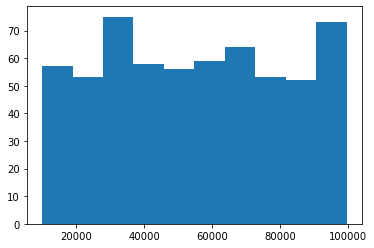

In [5]:
plt.hist(fraud['Taxable.Income'])

C:\Users\ips29\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Taxable.Income'>

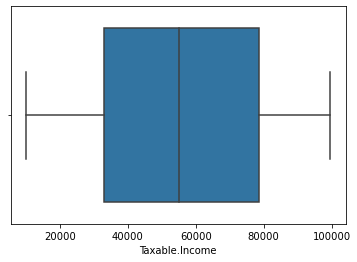

In [6]:
sns.boxplot(fraud['Taxable.Income'])

### Creating the logic for Decision Making

In [7]:
for i in range(len(fraud['Taxable.Income'])):
    if fraud['Taxable.Income'][i]>=30000 :
        fraud['Taxable.Income'][i]=1
    else:
        fraud['Taxable.Income'][i]=0

<ipython-input-7-56572e55f868>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['Taxable.Income'][i]=1
<ipython-input-7-56572e55f868>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraud['Taxable.Income'][i]=0


In [8]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


In [9]:
fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
Undergrad,600.0,0.520000,0.500017,0.0,0.00,1.0,1.00,1.0
Marital.Status,600.0,1.046667,0.821958,0.0,0.00,1.0,2.00,2.0
Taxable.Income,600.0,0.793333,0.405252,0.0,1.00,1.0,1.00,1.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0
Urban,600.0,0.503333,0.500406,0.0,0.00,1.0,1.00,1.0


In [10]:
x=fraud.iloc[:,fraud.columns !='Taxable.Income']
y=fraud['Taxable.Income']

In [11]:
fraud["Taxable.Income"].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=40)

### Building the Decision Tree Classifier using Entropy Criteria

In [13]:
model1=DecisionTreeClassifier(criterion="entropy",max_depth=4)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(775.0, 1359.0, 'City.Population <= 63983.0\nentropy = 0.722\nsamples = 480\nvalue = [96, 384]\nclass = Good'),
 Text(484.375, 1057.0, 'Work.Experience <= 23.5\nentropy = 0.537\nsamples = 106\nvalue = [13, 93]\nclass = Good'),
 Text(387.5, 755.0, 'City.Population <= 40128.5\nentropy = 0.635\nsamples = 81\nvalue = [13, 68]\nclass = Good'),
 Text(193.75, 453.0, 'Urban <= 0.5\nentropy = 0.811\nsamples = 36\nvalue = [9, 27]\nclass = Good'),
 Text(96.875, 151.0, 'entropy = 0.964\nsamples = 18\nvalue = [7, 11]\nclass = Good'),
 Text(290.625, 151.0, 'entropy = 0.503\nsamples = 18\nvalue = [2, 16]\nclass = Good'),
 Text(581.25, 453.0, 'Urban <= 0.5\nentropy = 0.433\nsamples = 45\nvalue = [4, 41]\nclass = Good'),
 Text(484.375, 151.0, 'entropy = 0.0\nsamples = 21\nvalue = [0, 21]\nclass = Good'),
 Text(678.125, 151.0, 'entropy = 0.65\nsamples = 24\nvalue = [4, 20]\nclass = Good'),
 Text(581.25, 755.0, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25]\nclass = Good'),
 Text(1065.625, 1057.0, 'C

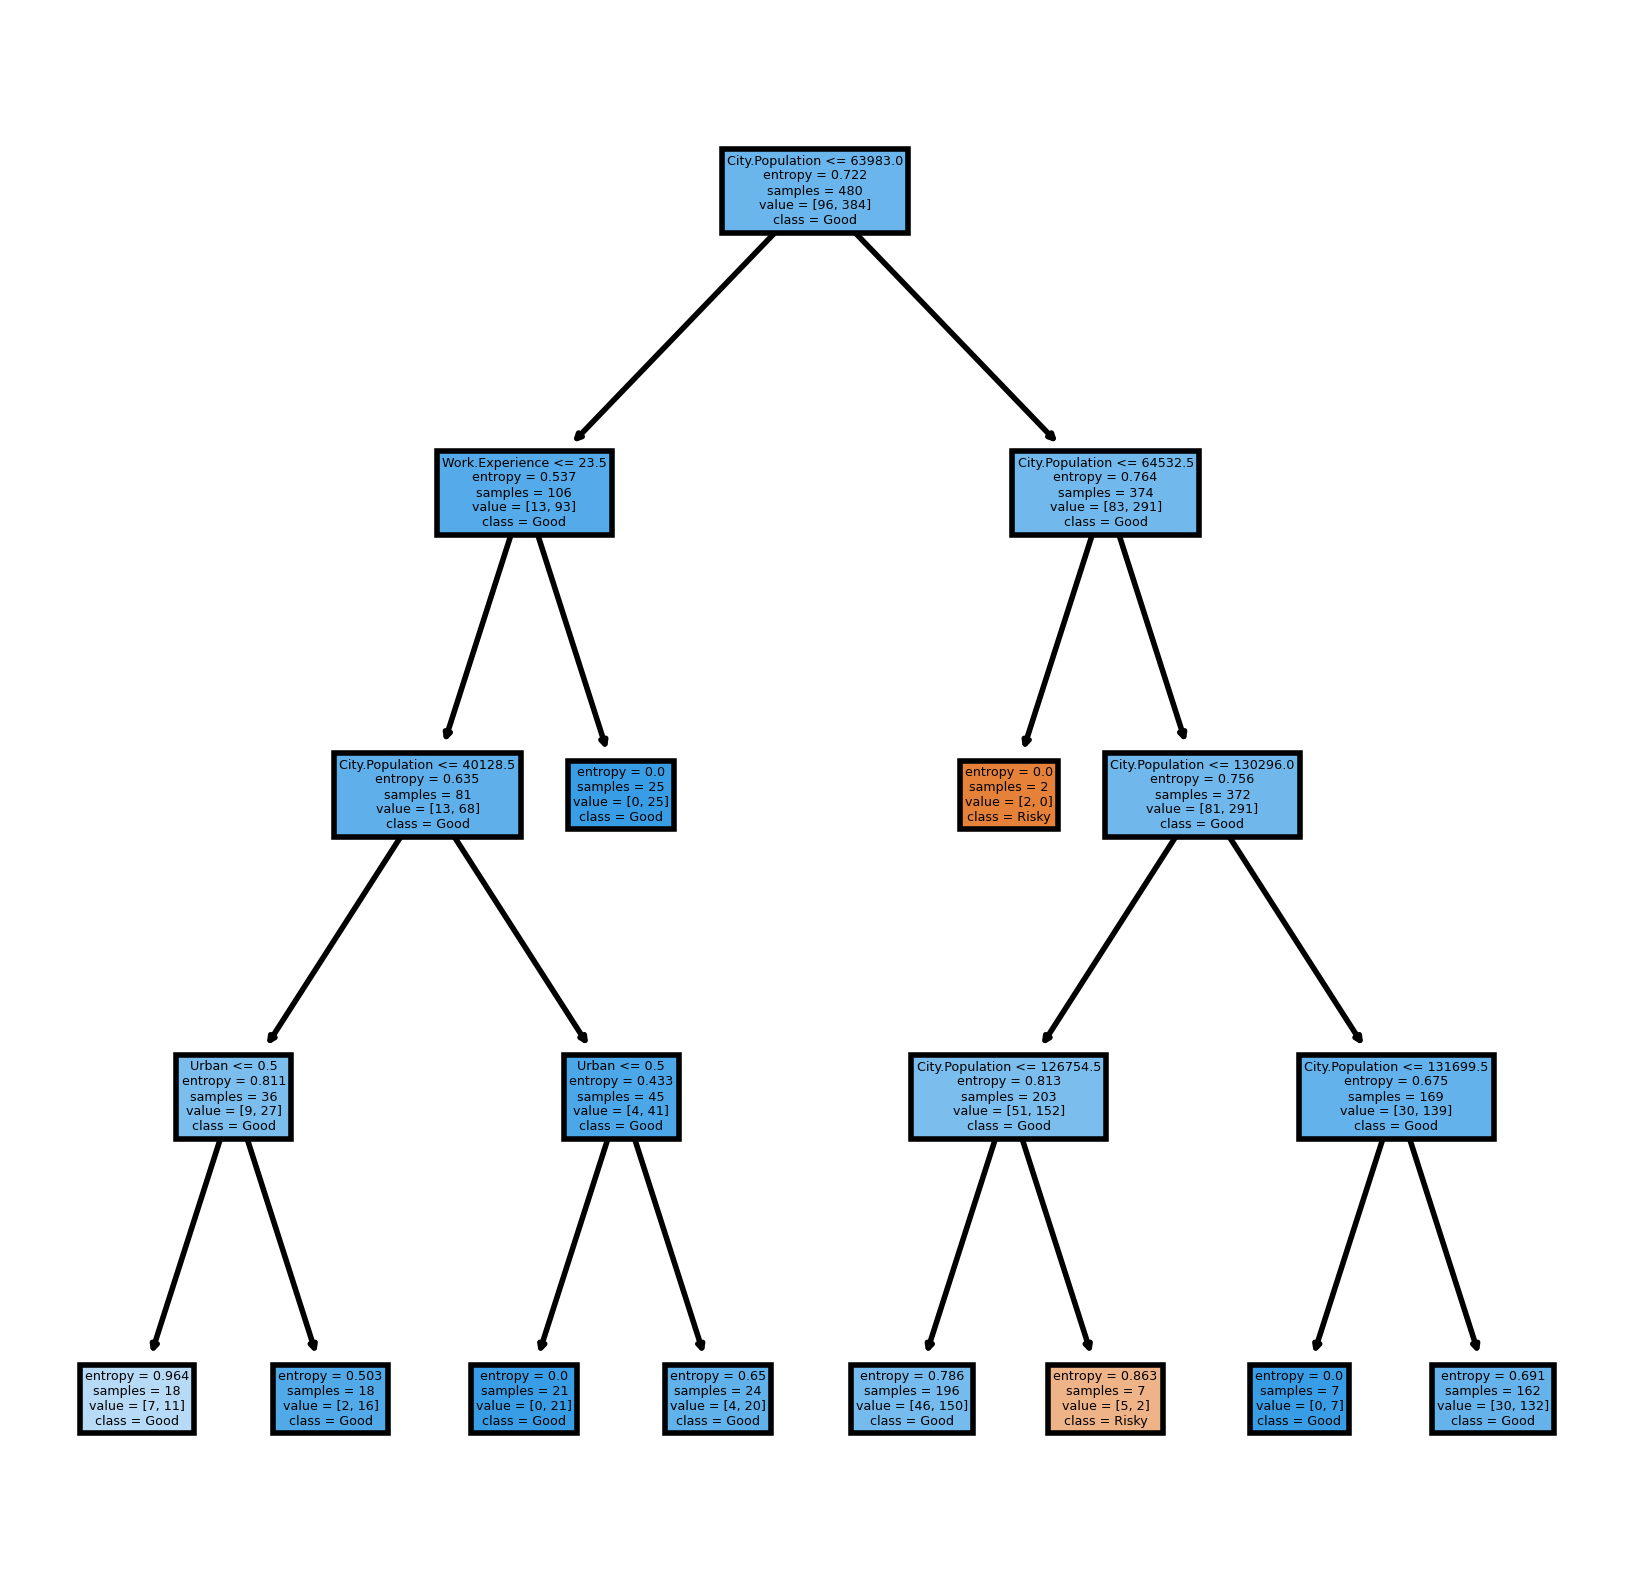

In [14]:
fn=list(x.columns)
cn=['Risky','Good']
fig,axes=plt.subplots(figsize=(5,5),dpi=400)
tree.plot_tree(model1,
              feature_names=fn,
              class_names=cn,
              filled=True)

In [15]:
pred=model1.predict(x_test)
pd.Series(pred).value_counts()

1    117
0      3
dtype: int64

In [18]:
pd.crosstab(y_test,pred)

col_0,0,1
Taxable.Income,,
0,1,27
1,2,90


In [19]:
print("Accuracy ={}%".format(round(np.mean(pred==y_test)*100,2)))

Accuracy =75.83%


Here we see that by using max_depth=3, the model gives all predictions as 1 and there are no 0. While usign max_depth=4, we get 3 zero predictions as well

#### Getting the important features for calssification and visualising them

In [20]:
imp_features1=pd.Series(model1.feature_importances_,index=fn).sort_values(ascending=False)
imp_features1

City.Population    0.626466
Urban              0.205741
Work.Experience    0.167793
Marital.Status     0.000000
Undergrad          0.000000
dtype: float64

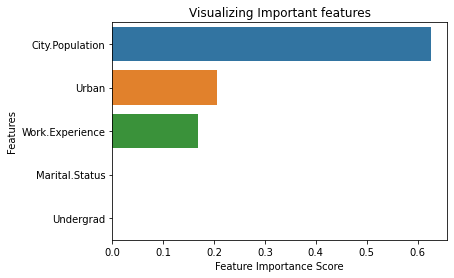

In [21]:
sns.barplot(x=imp_features1,y=imp_features1.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important features")
plt.show()

##### Hence we can see that the C5.0 model predicts City Population as the most important feature followed by Urban and Work Experience

### Building the Decision Tree Classifier using Gini Criteria

In [22]:
model2=DecisionTreeClassifier(criterion='gini',max_depth=4)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

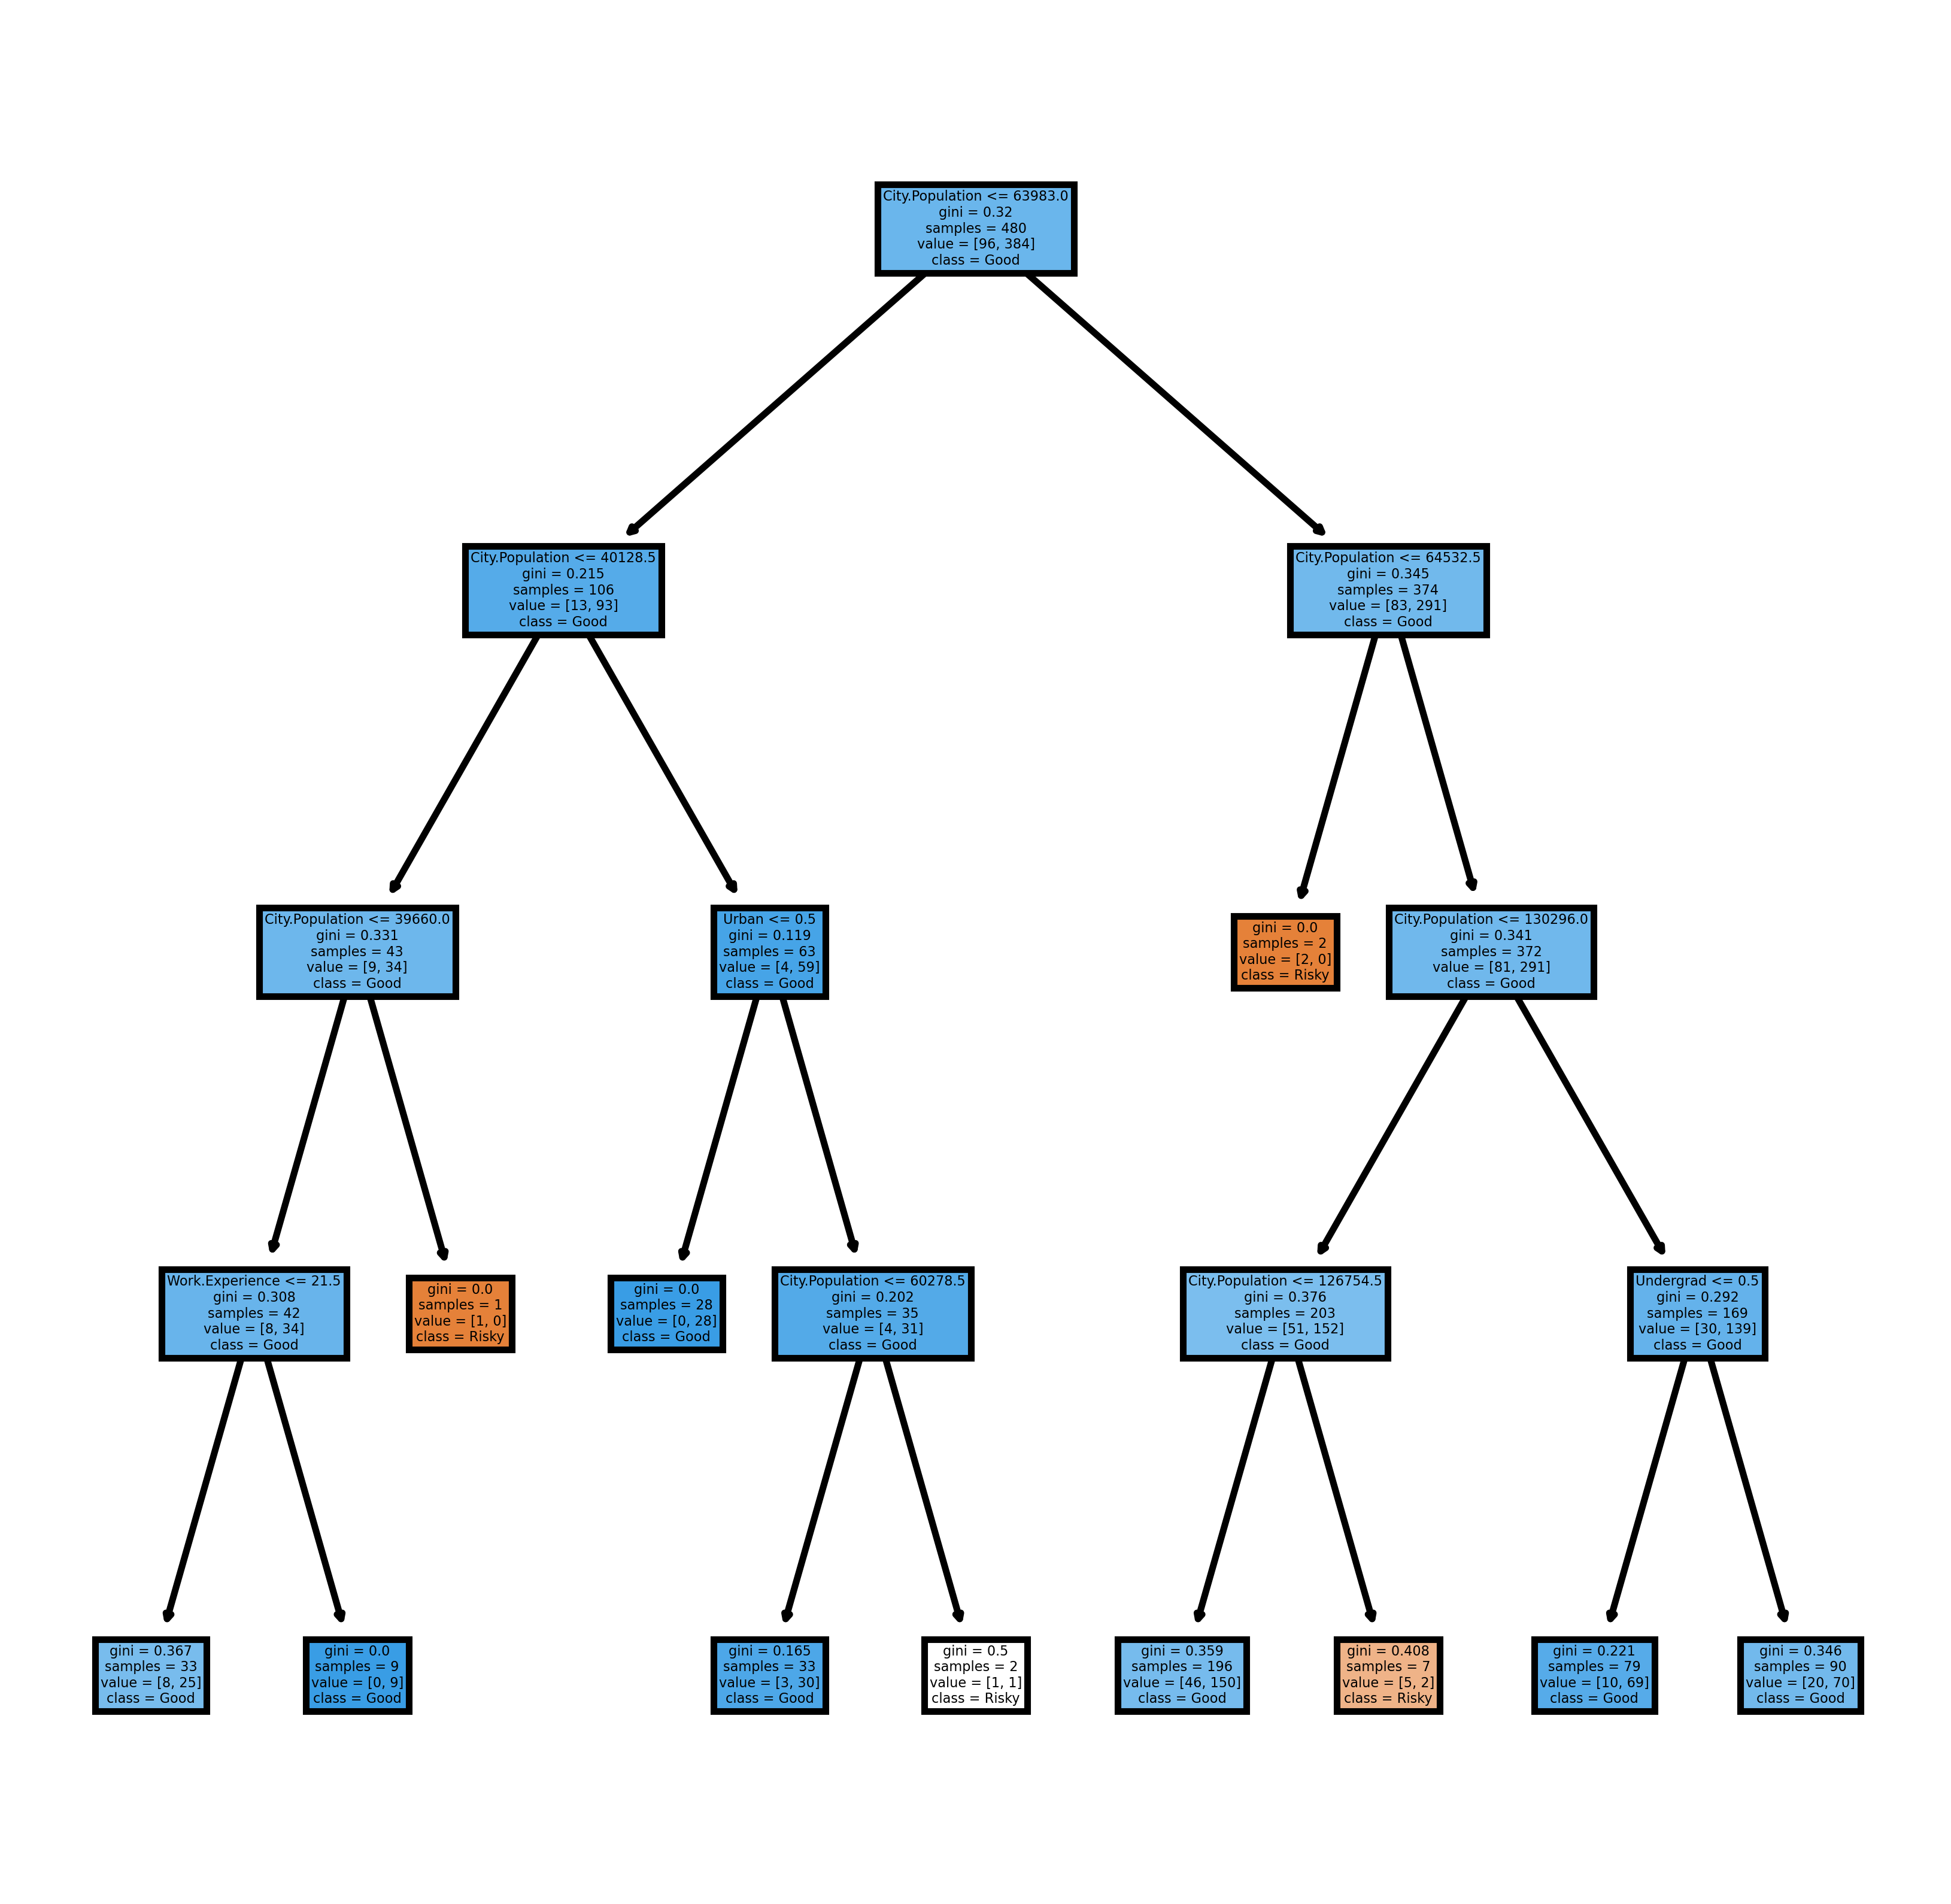

In [23]:
fig, axes = plt.subplots(figsize = (5,5), dpi=800)
tree.plot_tree(model2,
               feature_names =fn, 
               class_names=cn,
               filled = True);

In [24]:
pred2=model2.predict(x_test)
pd.Series(pred2).value_counts()

1    114
0      6
dtype: int64

In [25]:
print("Accuracy ={}%".format(round(np.mean(pred2==y_test)*100,2)))

Accuracy =75.0%


#### Getting the important features for calssification and visualising them

In [26]:
imp_features2=pd.Series(model2.feature_importances_,index=fn).sort_values(ascending=False)
imp_features2

City.Population    0.847705
Work.Experience    0.063065
Undergrad          0.058397
Urban              0.030832
Marital.Status     0.000000
dtype: float64

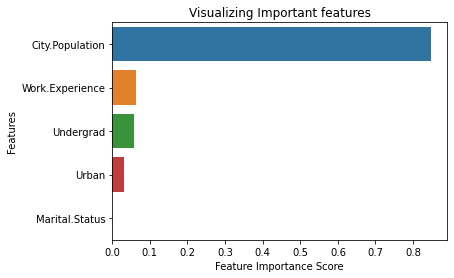

In [27]:
sns.barplot(x=imp_features2,y=imp_features2.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important features")
plt.show()

##### Hence we can see that in this case C5.0 model performs slightly better than the CART model and the most important features for classification of sales as high or low are predicted